<a href="https://colab.research.google.com/github/nikopj/SummerML/blob/master/Day6/Spiral_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spiral Classification with Neural Networks
See the Day5 Spiral compeitition challenge to understand the dataset.

# Import the Data

In [0]:
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/nikopj/SummerML/master/Day5/Spiral/spiral_train.csv"
df  = pd.read_csv(url)

print(df.head())

Xtr = df[['x1','x2']].values
ytr = df['class'].values.reshape(-1,1)

url = "https://raw.githubusercontent.com/nikopj/SummerML/master/Day5/Spiral/spiral_test_feature.csv"
df  = pd.read_csv(url)

Xts = df[['x1','x2']].values

url = "https://raw.githubusercontent.com/nikopj/SummerML/master/Day5/Spiral/spiral_test_class.csv"
df  = pd.read_csv(url)

yts = df['class'].values.reshape(-1,1)


     x1    x2  class
0 -0.11  3.08    0.0
1 -0.09 -1.71    0.0
2 -6.55 -8.60    1.0
3  0.66 -1.54    0.0
4  0.76 -5.30    1.0


# Visualize the Data

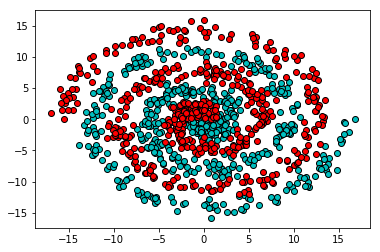

In [0]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(Xtr[ytr.flatten()==0,0], Xtr[ytr.flatten()==0,1],'oc',markeredgecolor='black');
plt.plot(Xtr[ytr.flatten()==1,0], Xtr[ytr.flatten()==1,1],'or',markeredgecolor='black');

# Normalize the Data 
## (optional)

In [0]:
import tensorflow as tf
from tensorflow.keras.utils import normalize

x_train = normalize(Xtr, axis=1)
y_train = ytr

print(x_train[:5,:])

[[-0.03569153  0.99936285]
 [-0.05255883 -0.99861783]
 [-0.60590385 -0.79553788]
 [ 0.3939193  -0.91914503]
 [ 0.14194429 -0.98987465]]


# Create the Model

In [0]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = tfk.models.Sequential(name='NN')
model.add(Dense(1024, activation='relu', input_dim=2, name='FC1'))
model.add(Dense(512, activation='relu', name='FC2'))
model.add(Dense(128, activation='relu', name='FC3'))
model.add(Dense(1, activation='sigmoid', name='Output'))

model.summary()

Model: "NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
FC1 (Dense)                  (None, 1024)              3072      
_________________________________________________________________
FC2 (Dense)                  (None, 512)               524800    
_________________________________________________________________
FC3 (Dense)                  (None, 128)               65664     
_________________________________________________________________
Output (Dense)               (None, 1)                 129       
Total params: 593,665
Trainable params: 593,665
Non-trainable params: 0
_________________________________________________________________


# Train the Model

In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

VAL_FREQ = 10
## hyperparameters
BATCH_SIZE = 200
EPOCHS = 250

history = model.fit(Xtr, ytr,
                   batch_size = BATCH_SIZE,
                   epochs = EPOCHS,
                   validation_split = .05,
                   shuffle = True,
                   validation_freq = VAL_FREQ,
                   verbose = 1)

Train on 950 samples, validate on 50 samples
Epoch 1/250
950/950 [==============================] - 0s 465us/sample - loss: 0.7300 - acc: 0.5274
Epoch 2/250
950/950 [==============================] - 0s 118us/sample - loss: 0.6907 - acc: 0.5747
Epoch 3/250
950/950 [==============================] - 0s 116us/sample - loss: 0.6808 - acc: 0.6011
Epoch 4/250
950/950 [==============================] - 0s 115us/sample - loss: 0.6784 - acc: 0.5895
Epoch 5/250
950/950 [==============================] - 0s 109us/sample - loss: 0.6754 - acc: 0.5979
Epoch 6/250
950/950 [==============================] - 0s 119us/sample - loss: 0.6733 - acc: 0.5958
Epoch 7/250
950/950 [==============================] - 0s 107us/sample - loss: 0.6734 - acc: 0.5916
Epoch 8/250
950/950 [==============================] - 0s 102us/sample - loss: 0.6719 - acc: 0.5958
Epoch 9/250
950/950 [==============================] - 0s 112us/sample - loss: 0.6692 - acc: 0.5926
Epoch 10/250
950/950 [==============================] -

# Vizualize the Training & Validation Accuracy 
## Check these to see if you need to retrain your model for a better validation score

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


Text(0.5, 1.0, 'Accuracy vs. Epochs')

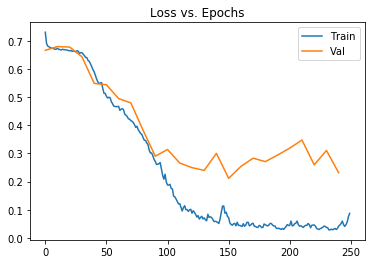

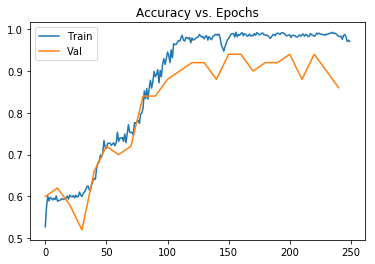

In [0]:
print(history.history.keys())

plt.figure()
plt.plot(np.arange(EPOCHS), history.history['loss'])
plt.plot(np.arange(0,EPOCHS,VAL_FREQ), history.history['val_loss'])
plt.legend(['Train', 'Val'])
plt.title('Loss vs. Epochs')

plt.figure()
plt.plot(np.arange(EPOCHS), history.history['acc'])
plt.plot(np.arange(0,EPOCHS,VAL_FREQ), history.history['val_acc'])
plt.legend(['Train', 'Val']);
plt.title('Accuracy vs. Epochs')

# Evaluate your model on the Test Data

In [0]:
y_pred = model.predict(Xts)
y_pred = y_pred>.5
acc = np.mean(y_pred == yts.reshape(-1,1))
print(acc)

0.92


# Verify your model accuracy graphically 
## (Optional)

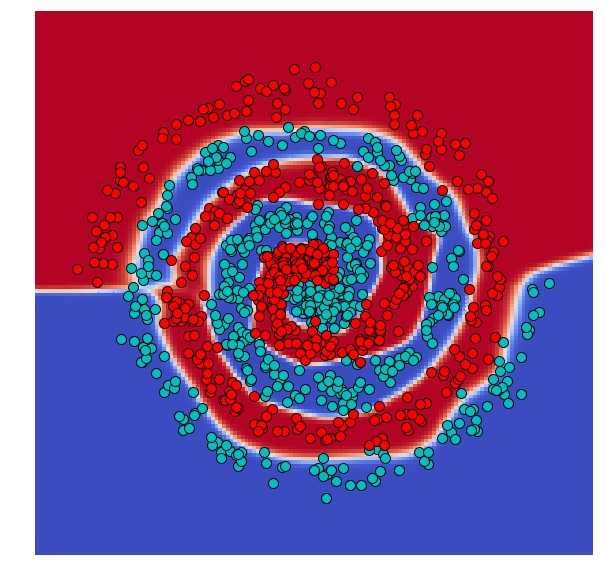

In [0]:
N = 150
xx = np.linspace(-20,20,N)
X1,X2 = np.meshgrid(xx,xx,indexing='ij')
x1 = X1.reshape(-1,1)
x2 = X2.reshape(-1,1)

XX = np.hstack([x1,x2])
P = model.predict(XX)
P = P.reshape(N,N)

plt.figure(figsize=(10,10))
plt.plot(Xtr[ytr.flatten()==0,0], Xtr[ytr.flatten()==0,1],'oc', ms=10, markeredgecolor='black');
plt.plot(Xtr[ytr.flatten()==1,0], Xtr[ytr.flatten()==1,1],'or', ms=10, markeredgecolor='black');
plt.pcolor(X1,X2,P, cmap="coolwarm");
plt.axis('off');
plt.savefig('spiral_classified.png')